# Sentiment Analysis

**Project Description:**

The Sentiment Analysis project is a key component of my internship at NexusInfo. This project focuses on leveraging machine learning techniques to analyze and categorize textual data based on the sentiment it expresses. The primary goal is to develop a predictive model capable of accurately determining whether a given text conveys positive or negative sentiment.

Throughout the internship, I will be involved in various stages of the project, including data preprocessing, feature extraction, model selection, and evaluation. These tasks involve cleaning and preparing the dataset, extracting relevant features from the text, selecting appropriate machine learning algorithms, and evaluating the performance of the developed models

**Data:**[Click here]()


## Importing libraries

In [2]:
import numpy as np 
import pandas as pd

/tmp/ipykernel_17785/118197663.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data Cleaning and Preparation

In [3]:
# Reading Data
dataset = pd.read_csv("sentiment_analysis.csv", encoding='latin-1')

In [4]:
# Finding total rows and columns
dataset.shape

(1048572, 6)

In [5]:
dataset.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:

# Renaming the columns
dataset.columns = ["polarity","id","date","query","user","text"]

In [7]:
#  Extracting necessary
dataset = dataset[["text","polarity"]]
dataset.head()

,text,polarity
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0


In [8]:
dataset.tail()

,text,polarity
1048567,My GrandMa is making Dinenr with my Mum,4
1048568,Mid-morning snack time... A bowl of cheese noo...,4
1048569,@ShaDeLa same here say it like from the Termi...,4
1048570,@DestinyHope92 im great thaanks wbuu?,4
1048571,cant wait til her date this weekend,4


In [9]:
# Basic Description of dataset
dataset.groupby("polarity").describe()

text                                        
           count  unique                        top freq
polarity                                                
0         799996  790181  isPlayer Has Died! Sorry   210
4         248576  246727              Good morning    43

In [10]:
# Total count of each sentiment

dataset.polarity.value_counts()

polarity
0    799996
4    248576
Name: count, dtype: int64

In [11]:
# Checing for null values

dataset.isnull().sum()

text        0
polarity    0
dtype: int64

In [12]:
# Checing for improper data formats

dataset.dtypes

text        object
polarity     int64
dtype: object

In [13]:
# Saving a copy of dataset
dataset1 = dataset.copy()


In [14]:
# Sepearting  negative sentiment  text

top2= dataset1[:799996]
top2.polarity.value_counts()

polarity
0    799996
Name: count, dtype: int64

In [15]:
# Sepearting  positive sentiment  text

down2 = dataset1[799996+1:]
down2.polarity.value_counts()

polarity
4    248575
Name: count, dtype: int64

In [16]:
# Duplicating the positive sentiment data as it is very less in comparision to the negative 

down2 = down2.sample(799996,replace=True)
down2.polarity.value_counts()

polarity
4    799996
Name: count, dtype: int64

In [17]:
# Making a final combined dataset

dataset2 = pd.concat([top2,down2],ignore_index=True)
dataset2.polarity.value_counts()

polarity
0    799996
4    799996
Name: count, dtype: int64

In [18]:
dataset2.head()

,text,polarity
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0


In [19]:
# Cleaning the text
import re
import pandas as pd

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the clean_text function to the 'text' column of your DataFrame
dataset2['clean_text'] = dataset2['text'].apply(clean_text)

In [20]:
dataset2.head()

,text,polarity,clean_text
0,is upset that he can't update his Facebook by ...,0,is upset that he cant update his facebook by t...
1,@Kenichan I dived many times for the ball. Man...,0,kenichan i dived many times for the ball manag...
2,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire
3,"@nationwideclass no, it's not behaving at all....",0,nationwideclass no its not behaving at all im ...
4,@Kwesidei not the whole crew,0,kwesidei not the whole crew


## Model Training and Evaluation

In [21]:
# Splitting the data into training and testing

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(dataset2.clean_text,dataset2.polarity,test_size=0.3)

In [22]:
xtrain.shape

(1119994,)

In [23]:
ytrain.value_counts()

polarity
0    560115
4    559879
Name: count, dtype: int64

In [24]:
ytest.value_counts()

polarity
4    240117
0    239881
Name: count, dtype: int64

In [25]:
xtest.shape

(479998,)

In [26]:
xtrain.values

array(['  i miss there  i wanna come back its a beautiful place i loved it',
       'sat in bed drinking a nice cuppa whilst watching hollyoaks ',
       'i wanna see up tonight but no one will go with me whhhyyy ', ...,
       'wondering if my support is jinxing certain motogp riders  nicky hayden amp james quotjtquot toseland are both really stuggling at the mo ',
       'im sleepy my head aches and my throat hurts and i want to go home ',
       'rip grandpa  graduation today'], dtype=object)

### Tokenising

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

xtrain_count = v.fit_transform(xtrain.values)

In [28]:

xtrain_count.shape

(1119994, 432299)

In [29]:
from sklearn.naive_bayes import MultinomialNB    

In [30]:
model = MultinomialNB(alpha=0.1)
model.fit(xtrain_count,ytrain)

MultinomialNB(alpha=0.1)

In [31]:
xtest_count = v.transform(xtest)
model.score(xtest_count,ytest)

0.8410660044416852

In [32]:
predicted = model.predict(xtest_count)

In [33]:
ytest.value_counts()

polarity
4    240117
0    239881
Name: count, dtype: int64

In [34]:
from sklearn.metrics import classification_report 

report = classification_report(ytest,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84    239881
           4       0.84      0.85      0.84    240117

    accuracy                           0.84    479998
   macro avg       0.84      0.84      0.84    479998
weighted avg       0.84      0.84      0.84    479998



### Building pipeling


In [35]:
from sklearn.pipeline  import Pipeline

pipeline = Pipeline([("v",CountVectorizer()),("model",MultinomialNB(alpha=1))])

pipeline.fit(xtrain,ytrain)

navies_acc=pipeline.score(xtest,ytest)

In [36]:
pipeline.predict(["fantastic restaurant"])

array([4])

In [37]:
naives_predict= pipeline.predict(xtest)

### SVM Model

In [74]:
dataset.shape

(1048572, 2)

In [75]:
# SVM model can not be trained on large dataset, creating a dataset
svm_data = pd.concat([dataset2[:1000],dataset2[-1000:]],axis="rows")
svm_data.shape 

(2000, 3)

In [76]:
svm_data.dropna(inplace=True)
svm_data.isnull().sum()

text          0
polarity      0
clean_text    0
dtype: int64

In [77]:
svm_data.polarity.value_counts()

polarity
0    1000
4    1000
Name: count, dtype: int64

In [78]:
from sklearn.model_selection import   train_test_split
sxtrain,sxtest,sytrain,sytest = train_test_split(svm_data.clean_text,svm_data.polarity,test_size=0.3) 

In [79]:
sxtrain

585        i dont want to walk home in this snow who want...
1599757                          going to workout  swin fun 
1599145    wahoopooh mmm pink  stands out and makes mre p...
1599300      angelenefay throw me a frikkin bone here  hehe 
1599084                 tylluan i knew i could count on you 
                                 ...                        
1599515    agoldenberg very true next time i am sticking ...
1599258    patrickmoorhead mms a lovely postrock band you...
1599277    stephenfry treat yourself to a nice drop of ci...
1599525    i fell for austin taura hanafiah even morreee ...
1599977    why are pirates pirates coz they arhhhhhhhh  t...
Name: clean_text, Length: 1400, dtype: object

In [80]:
# Convertin text to columns
k= CountVectorizer()
sxtrain_count = k.fit_transform(sxtrain)

In [81]:
from sklearn.svm import SVC

In [82]:
sxtrain_count.shape

(1400, 4408)

In [83]:
sytrain.value_counts()

polarity
4    713
0    687
Name: count, dtype: int64

In [84]:
svm = SVC(C=1,kernel="rbf",gamma="auto")
svm.fit(sxtrain_count,sytrain)

SVC(C=1, gamma='auto')

In [85]:
sxtest_count = k.transform(sxtest)
svm.score(sxtest_count,sytest)

0.47833333333333333

In [86]:
# Using GridSearchCV for improvement
from sklearn.model_selection import GridSearchCV


In [87]:
parameters = {"C":[1,10,0.1,0.01,0.001,0.0001,0.00001,100],"gamma":[0.1,0.01,1,10,"auto"],"kernel":["linear","rbf"]}
cv = GridSearchCV(SVC(),parameters,cv=3)

In [88]:
cv.fit(sxtrain_count,sytrain)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 10, 0.1, 0.01, 0.001, 0.0001, 1e-05, 100],
                         'gamma': [0.1, 0.01, 1, 10, 'auto'],
                         'kernel': ['linear', 'rbf']})

In [89]:
svm_score=cv.best_score_

In [91]:
svm_best=cv.best_estimator_

In [141]:
svm_acc=svm_best.score(sxtest_count,sytest)


In [95]:
svm_predict= svm_best.predict(sxtest_count)

### LSTM Model

In [96]:
from tensorflow import keras

2024-02-12 22:04:37.445934: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-12 22:04:39.177344: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 22:04:39.177481: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 22:04:39.476363: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-12 22:04:40.144499: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-12 22:04:40.147770: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [97]:
# Creating dataset for lstm model
lstm_data = pd.concat([dataset2.head(5000),dataset2.tail(5000)],axis="rows")
print(lstm_data.shape)
lstm_data.head()

(10000, 3)


,text,polarity,clean_text
0,is upset that he can't update his Facebook by ...,0,is upset that he cant update his facebook by t...
1,@Kenichan I dived many times for the ball. Man...,0,kenichan i dived many times for the ball manag...
2,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire
3,"@nationwideclass no, it's not behaving at all....",0,nationwideclass no its not behaving at all im ...
4,@Kwesidei not the whole crew,0,kwesidei not the whole crew


In [98]:
# importing all required libraries
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, LSTM, Dropout

In [99]:
# Converting each word to tokens
max_words= 5000
encoded_x = [one_hot(text,max_words) for text in dataset1.text.values]
print(len(encoded_x))

1048572


In [100]:
# Padding each text to same size
max_length = 40
padded = pad_sequences(encoded_x,maxlen=max_length,padding="post")
padded

array([[3948, 1332, 4949, ...,    0,    0,    0],
       [4404, 3436,  990, ...,    0,    0,    0],
       [1826, 1203, 3751, ...,    0,    0,    0],
       ...,
       [3281,  196, 4554, ...,    0,    0,    0],
       [1217, 4593, 3071, ...,    0,    0,    0],
       [ 760, 3061, 3039, ...,    0,    0,    0]], dtype=int32)

In [101]:
# Neural network building
embedded_vector = 30
model = Sequential()
model.add(Embedding(max_words,embedded_vector,input_length=max_length,name="embedding"))
model.add(Dropout(0.4))
model.add(LSTM(30))
model.add(Dropout(0.4))
model.add(Dense(1,activation="sigmoid"))

In [102]:
x=padded
y=dataset1.polarity

In [103]:
# Replacing all 4's with 1's 
y.replace(4,1,inplace=True)

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
lxtrain,lxtestm,lytrain,lytest = train_test_split(x,y,test_size=0.3)

In [106]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 30)            150000    
                                                                 
 dropout (Dropout)           (None, 40, 30)            0         
                                                                 
 lstm (LSTM)                 (None, 30)                7320      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 157351 (614.65 KB)
Trainable params: 157351 (614.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
model.fit(lxtrain,lytrain,epochs=1)

2024-02-12 22:05:13.597339: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 117440000 exceeds 10% of free system memory.


22938/22938 [==============================] - 390s 17ms/step - loss: 0.4036 - accuracy: 0.8253


In [143]:
lstm_metrics=model.evaluate(lxtestm,lytest)

2024-02-12 22:54:29.495410: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 50331520 exceeds 10% of free system memory.


9831/9831 [==============================] - 81s 8ms/step - loss: 0.3722 - accuracy: 0.8384


In [142]:
lstm_predict=model.predict(lxtestm)

2024-02-12 22:52:04.456781: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 50331520 exceeds 10% of free system memory.


9831/9831 [==============================] - 86s 9ms/step


In [144]:
lstm_acc=lstm_metrics[1]

### Model Evaluations:

In [113]:
from sklearn.metrics import confusion_matrix
navies_cm=confusion_matrix(ytest,naives_predict)


In [114]:
svm_cm = confusion_matrix(sytest,svm_predict)

In [127]:
lstm_binary_predictions = np.where(lstm_predict > 0.5, 1, 0)


In [128]:
lstm_cm=confusion_matrix(lytest,lstm_binary_predictions)

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

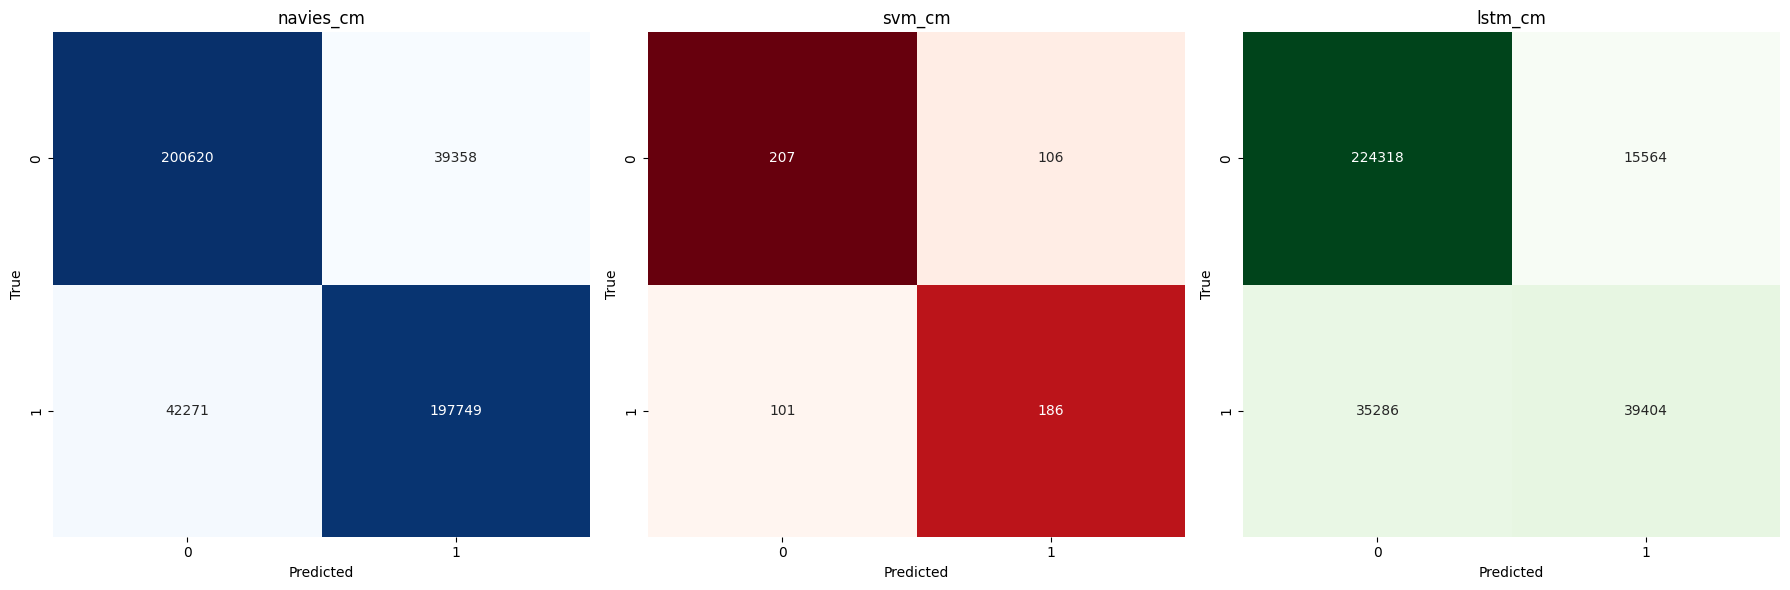

In [137]:
# Plot the confusion matrices side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for the first confusion matrix
sns.heatmap(navies_cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[0])
axs[0].set_title('navies_cm')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('True')

# Plot for the second confusion matrix
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Reds', cbar=False, ax=axs[1])
axs[1].set_title('svm_cm')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('True')

# Plot for the third confusion matrix
sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axs[2])
axs[2].set_title('lstm_cm')
axs[2].set_xlabel('Predicted')
axs[2].set_ylabel('True')

plt.tight_layout()
plt.show()

In [ ]:
# It is difficult to compare models based on confusion matrix as the length of dataset for each model different
# So lets compare using the accuray

metrics= pd.DataFrame({"naives_bayes":[navies_acc],"svm_model":[svm_acc],"lstm_model":[lstm_acc]})
metrics


,naives_bayes,svm_model,lstm_model
0,0.829939,0.655,0.838352


### Model Saving

In [38]:
# We can observe that both naives_bayes an lstm_model are perfoming almost the same. So, here I am preferring naives_bayes model for
import pickle
with open("sentiment_model.pkl",'wb') as file:
    pickle.dump(pipeline,file)